In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.shape

(10000, 10)

## Exploratory Data Analysis

#### Target Column

In [4]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

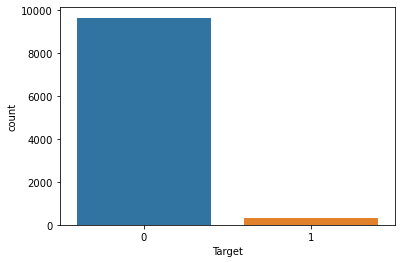

In [5]:
sns.countplot(data=df, x='Target')

#### Failure Type Column

In [6]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

<AxesSubplot:>

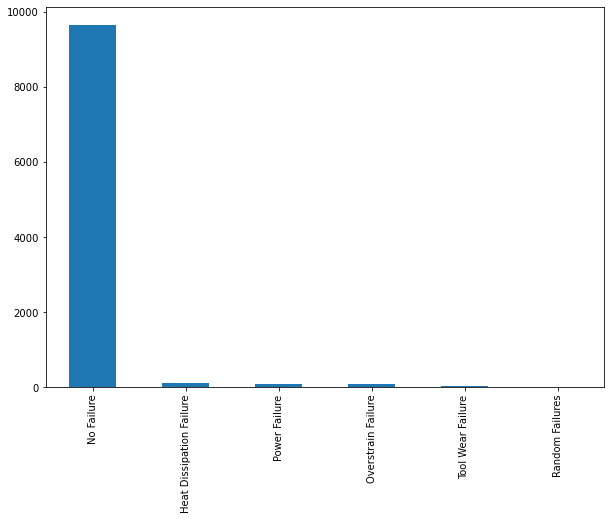

In [7]:
plt.figure(figsize=(10,7))
df['Failure Type'].value_counts().plot(kind='bar')

#### Target Column and Failure Type Column

In [8]:
df.groupby(['Target','Failure Type']).size()

Target  Failure Type            
0       No Failure                  9643
        Random Failures               18
1       Heat Dissipation Failure     112
        No Failure                     9
        Overstrain Failure            78
        Power Failure                 95
        Tool Wear Failure             45
dtype: int64

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

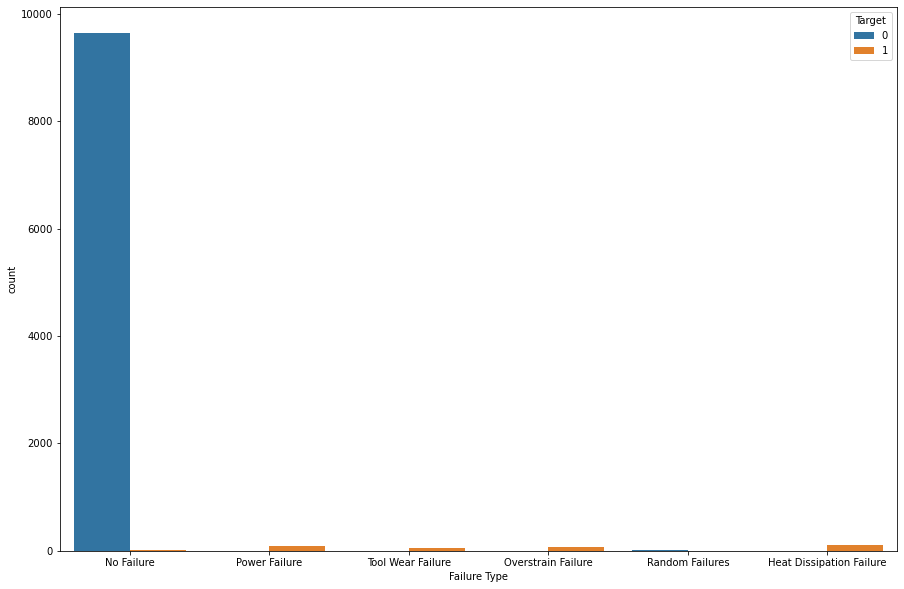

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Failure Type', hue='Target')

#### Type Column

In [10]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

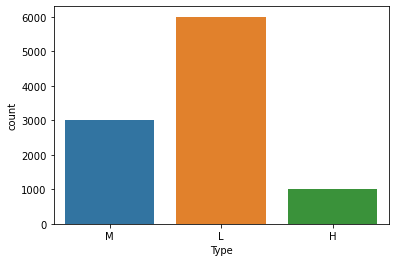

In [11]:
sns.countplot(data=df, x= 'Type')

<AxesSubplot:ylabel='Type'>

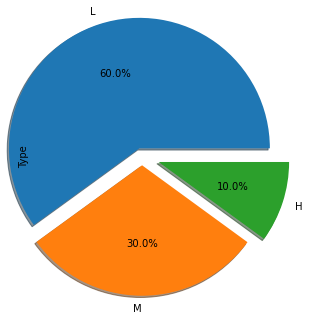

In [12]:
df['Type'].value_counts().plot(kind='pie', radius= 1.5, autopct = '%.1f%%', shadow=True, 
                                  explode=[0.1,0.1,0.2])

#### Target column and Type column

In [13]:
df.groupby(['Target','Type']).size()

Target  Type
0       H        982
        L       5765
        M       2914
1       H         21
        L        235
        M         83
dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

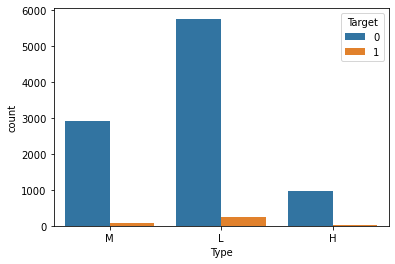

In [14]:
sns.countplot(data=df, x='Type', hue='Target')

#### Air temperature [K] Column

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Count'>

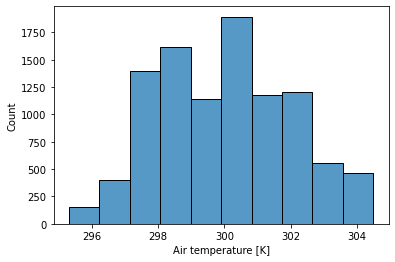

In [15]:
sns.histplot(data=df,x='Air temperature [K]', bins=10)

#### Target Column and Air temperature [K] Column

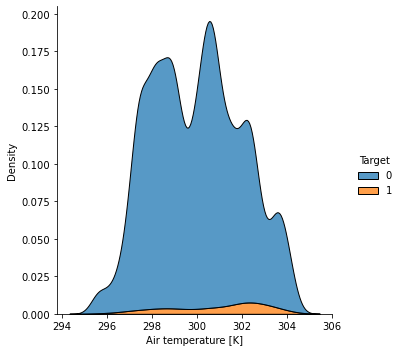

In [16]:
sns.displot(data=df, x='Air temperature [K]', hue='Target', kind='kde', multiple='stack')

#### Process temperature [K] column

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Count'>

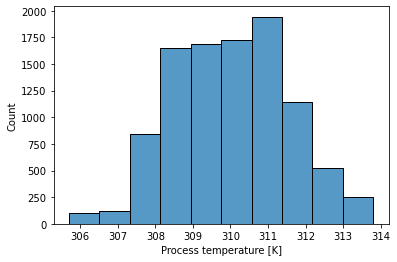

In [17]:
sns.histplot(data=df, x= 'Process temperature [K]', bins=10)

#### Target Column and Process temperature [K] column

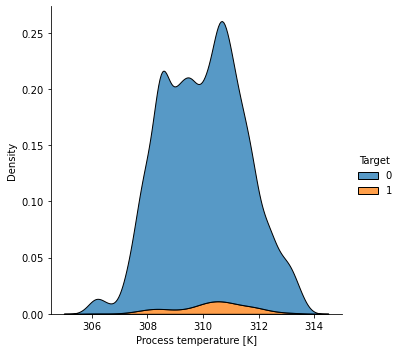

In [18]:
sns.displot(data=df, x= 'Process temperature [K]', hue='Target', kind='kde', multiple='stack')

#### Rotational speed [rpm] Column

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Count'>

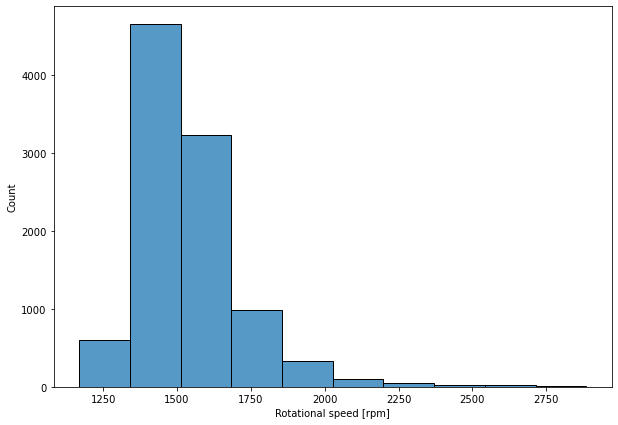

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Rotational speed [rpm]', bins=10)

#### Target Column and Rotational speed [rpm] Column

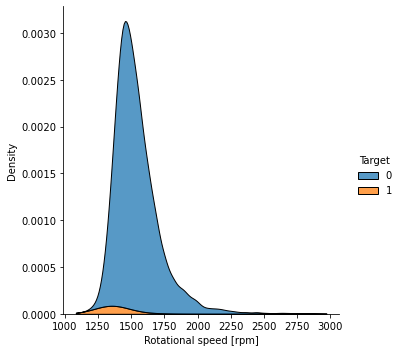

In [20]:
sns.displot(data=df, x='Rotational speed [rpm]', hue='Target', kind='kde', multiple='stack')

#### Torque [Nm] Column

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Count'>

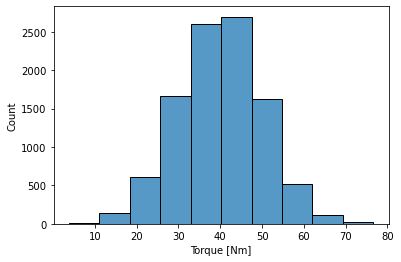

In [21]:
sns.histplot(data=df, x='Torque [Nm]', bins=10)

#### Target Column and Torque [Nm] Column

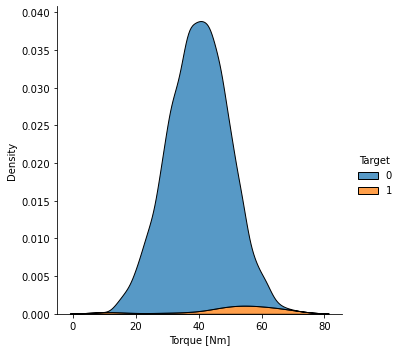

In [22]:
sns.displot(data=df, x= 'Torque [Nm]', hue='Target', kind='kde', multiple='stack')

#### Tool wear [min] Column

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Count'>

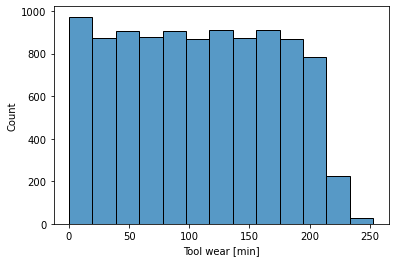

In [23]:
sns.histplot(data=df, x='Tool wear [min]', bins=13)

#### Target Column and Tool wear [min] Column

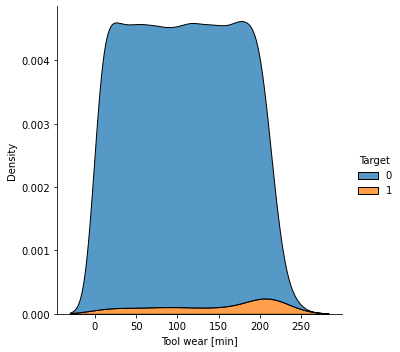

In [24]:
sns.displot(data=df, x='Tool wear [min]', hue='Target', kind='kde', multiple='stack')

## Feature Engineering

In [25]:
df1 = df.copy()
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#### Checking Null Values

In [27]:
df1.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

There are no null values

#### Setting UDI as index

In [28]:
df1.set_index('UDI', inplace=True)

In [29]:
df1.head(2)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


#### Label Encoding for Type Column

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1['Type'] = encoder.fit_transform(df1['Type'])
df1.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,2,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,1,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,1,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,1,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,1,298.2,308.7,1408,40.0,9,0,No Failure


In [31]:
# creating new table with neccessary columns
df2 = df1.drop(['Product ID','Failure Type'], axis=1).copy()
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0
2,1,298.2,308.7,1408,46.3,3,0
3,1,298.1,308.5,1498,49.4,5,0
4,1,298.2,308.6,1433,39.5,7,0
5,1,298.2,308.7,1408,40.0,9,0


#### Pair plot

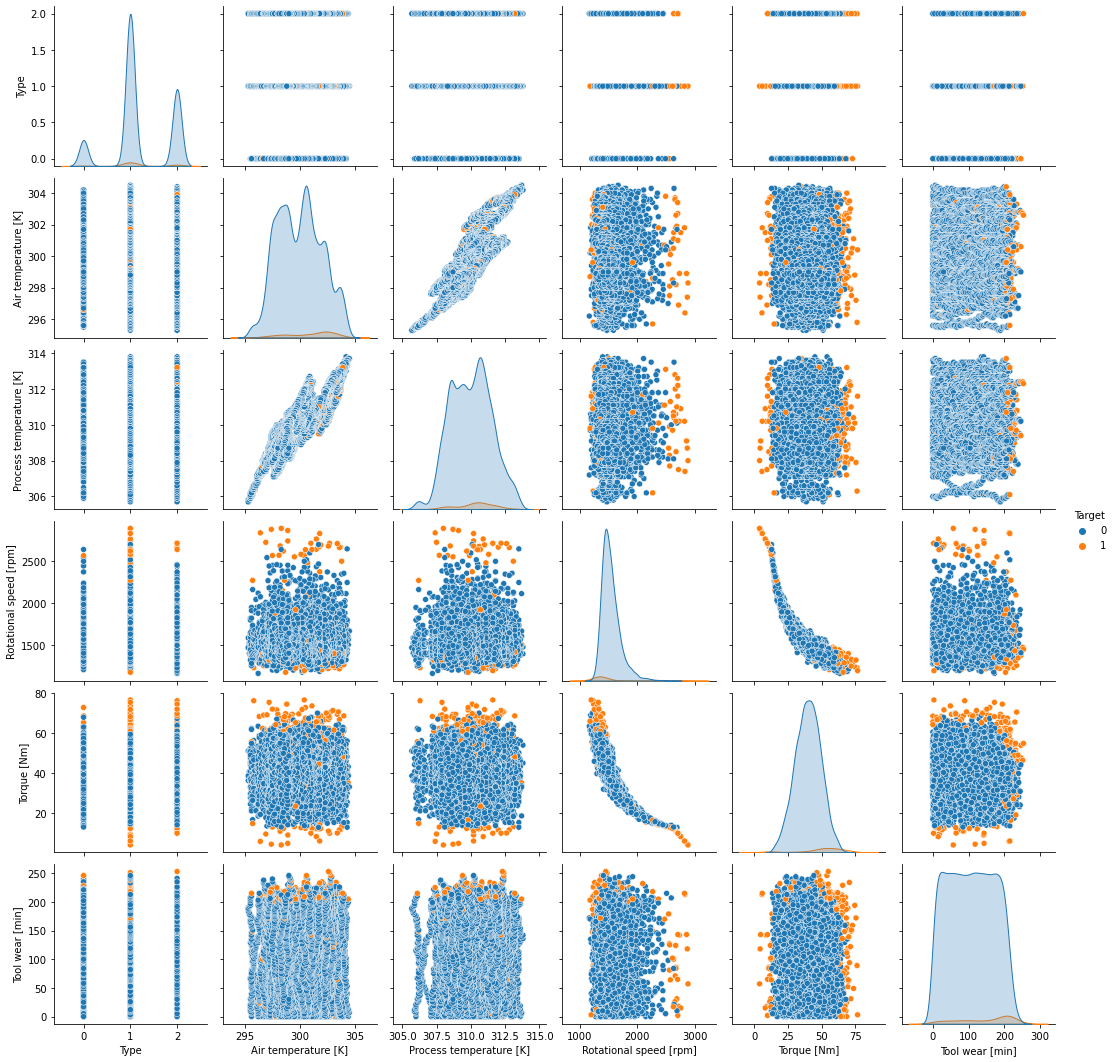

In [32]:
sns.pairplot(data=df2, hue='Target')

#### Specifying Features and Target Variable

In [33]:
x = df2.drop('Target', axis=1)
y = df2['Target']

#### Train, Test and Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [36]:
x_train.shape

(8000, 6)

In [37]:
x_test.shape

(2000, 6)

#### Samplig Data using SMOTE

In [38]:
y_train.value_counts()

0    7742
1     258
Name: Target, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE(sampling_strategy='minority')
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [41]:
y_train_sm.value_counts()

0    7742
1    7742
Name: Target, dtype: int64

#### GridSearchCV to Tune Hyperparameters of Random Forest Classifier, Decision Tree and Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Build Model Using Decision Tree

#### Tuning hyperparameters by Using GridSearchCV for Decision Tree Classifier

In [43]:
tree_model = DecisionTreeClassifier()

tree_params = {
    'criterion': ['gini','entropy'],
    'max_features': ['sqrt','log2']
}

# Create a GridSearchCV object and fit it to the data
tree_gs = GridSearchCV(tree_model, param_grid=tree_params, cv=5)
tree_gs.fit(x_train_sm, y_train_sm)

# Print the best hyperparameters and the corresponding score
print('Best Score: ', tree_gs.best_score_)
print('Best Params: ', tree_gs.best_params_)

Best Score:  0.9566649896248682
Best Params:  {'criterion': 'entropy', 'max_features': 'log2'}


## Build Model Using Random Forest Classifier

#### Tuning hyperparameters by Using GridSearchCV for Random Forest Classifier

In [44]:
forest_model = RandomForestClassifier()

params = {
    'n_estimators': [50,100,150],
    'criterion': ['gini','entropy']
}

# Create a GridSearchCV object and fit it to the data
clf = GridSearchCV(forest_model, param_grid=params, cv=5)
clf.fit(x_train_sm, y_train_sm)


# Print the best hyperparameters and the corresponding score
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.9751354565850591
Best Params:  {'criterion': 'entropy', 'n_estimators': 50}


## Build Model Using Logistic Regression

#### Scaling Data

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Sampling scaled Data

In [47]:
sm = SMOTE(sampling_strategy='minority')
x_train_sm1, y_train_sm1 = sm.fit_resample(x_train, y_train)

In [48]:
y_train_sm1.value_counts()

0    7742
1    7742
Name: Target, dtype: int64

#### Tuning hyperparameters  by Using GridSearchCV for Logistic Regression

In [49]:
lr_model = LogisticRegression()

lr_params = {
    'C':[1,5,10],
    'solver':['lbfgs','liblinear'],
}

# Create a GridSearchCV object and fit it to the data
lr_gs = GridSearchCV(lr_model, param_grid=lr_params, cv=5)
lr_gs.fit(x_train_sm1, y_train_sm1)

# Print the best hyperparameters and the corresponding score
print('Best Score: ', lr_gs.best_score_)
print('Best Params: ', lr_gs.best_params_)

Best Score:  0.8256910705450553
Best Params:  {'C': 1, 'solver': 'lbfgs'}


#### Comparing the result of different Model

In [50]:
result_dict = {
    
    'decision tree': {
        "Best Score": tree_gs.best_score_,
        "Best Params": tree_gs.best_params_
        },
    
    'random forest': {
        "Best Score": clf.best_score_,
        "Best Params": clf.best_params_
    },
    
    'logistic regression': {
        "Best Score": lr_gs.best_score_,
        "Best Params": lr_gs.best_params_
    }
}

result_df = pd.DataFrame(result_dict).T
result_df = result_df.reset_index()
result_df = result_df.rename(columns={'index': 'Algorithm'})
result_df

,Algorithm,Best Score,Best Params
0,decision tree,0.956665,"{'criterion': 'entropy', 'max_features': 'log2'}"
1,random forest,0.975135,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic regression,0.825691,"{'C': 1, 'solver': 'lbfgs'}"


#### CONCLUSION
Comparatively, Random Forest Classifier has best score with respect to Logistic Regression model and Decision Tree Classifier. So, Random Forest Classifier is choosen as best model.

In [51]:
# Creating object of Random Forest Classifier
model1 = RandomForestClassifier(n_estimators= 150, criterion= 'entropy',max_features= 'sqrt')
model1.fit(x_train_sm1, y_train_sm1)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [52]:
# Prediction of test and train data
yPredTest = model1.predict(x_test)
yPredTrain = model1.predict(x_train_sm)

#### Metrics to Evaluate the Random Forest Classifier Model

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, yPredTest))
print(classification_report(y_train_sm1, yPredTrain))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1919
           1       0.48      0.78      0.60        81

    accuracy                           0.96      2000
   macro avg       0.74      0.87      0.79      2000
weighted avg       0.97      0.96      0.96      2000

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7742
           1       1.00      0.99      0.99      7742

    accuracy                           0.99     15484
   macro avg       0.99      0.99      0.99     15484
weighted avg       0.99      0.99      0.99     15484



[[1852   67]
 [  18   63]]


Text(33.0, 0.5, 'Actual')

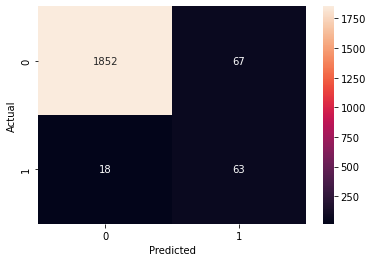

In [55]:
cm = confusion_matrix(y_test, yPredTest)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')